<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E4%BD%BF%E7%94%A8%E6%95%B8%E6%93%9A/Iris%E6%95%B8%E6%93%9A%E9%9B%86%E9%80%B2%E8%A1%8C%E6%95%B8%E6%93%9A%E9%81%B8%E6%93%87%E8%88%87%E5%88%87%E7%89%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [2]:
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

## 使用 Scikit-learn 的 Iris 數據集進行數據選擇與切片

這個範例將載入 Scikit-learn 內建的 Iris (鳶尾花) 數據集，並使用 NumPy 的索引和切片功能來選擇數據的子集，最後使用 Matplotlib 視覺化不同類別鳶尾花的特徵分佈。

特徵數據 X 的前5筆:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
目標變數 y 的前5筆: [0 0 0 0 0]
特徵名稱: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
類別名稱: ['setosa' 'versicolor' 'virginica']

選擇花萼長度和花瓣長度的前5筆數據:
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]

屬於 setosa 類別的前5筆數據:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

花瓣長度大於 5.0 的前5筆數據:
 [[6.  2.7 5.1 1.6]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]]


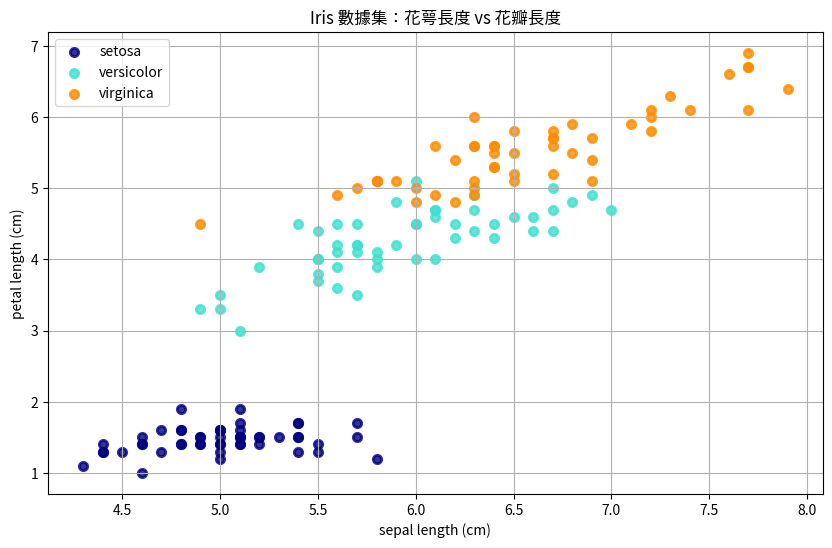

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 設定中文字型

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")


# 1. 載入 Iris 數據集
iris = load_iris()
X = iris.data # 特徵數據 (Numpy array)
y = iris.target # 目標變數 (Numpy array)
feature_names = iris.feature_names
target_names = iris.target_names

print("特徵數據 X 的前5筆:\n", X[:5])
print("目標變數 y 的前5筆:", y[:5])
print("特徵名稱:", feature_names)
print("類別名稱:", target_names)

# 2. NumPy 數據選擇與切片
# 選擇第一個特徵 (花萼長度 sepal length) 和第三個特徵 (花瓣長度 petal length)
X_selected_features = X[:, [0, 2]]
print("\n選擇花萼長度和花瓣長度的前5筆數據:\n", X_selected_features[:5])

# 選擇屬於類別 0 (setosa) 的所有數據
X_setosa = X[y == 0]
print("\n屬於 setosa 類別的前5筆數據:\n", X_setosa[:5])

# 選擇花瓣長度 (第三個特徵) 大於 5.0 的數據
X_petal_length_gt_5 = X[X[:, 2] > 5.0]
print("\n花瓣長度大於 5.0 的前5筆數據:\n", X_petal_length_gt_5[:5] if X_petal_length_gt_5.shape[0] > 0 else "無符合條件的數據")

# 3. 使用 Matplotlib 視覺化特徵分佈 (花萼長度 vs 花瓣長度)
plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']

for i, color, target_name in zip(range(len(target_names)), colors, target_names):
    plt.scatter(X[y == i, 0], X[y == i, 2], color=color, alpha=.8, lw=2,
                label=target_name)

plt.title('Iris 數據集：花萼長度 vs 花瓣長度')
plt.xlabel(feature_names[0]) # feature_names 本身是英文，若要改中文需手動對應
plt.ylabel(feature_names[2]) # 例如：plt.xlabel('花萼長度 (cm)')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()